# Black Friday Sales Prediction

In [52]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [53]:
# Setting the Working directory
path = 'C:/Users/avina/Desktop/Assignments/Projects/Black Friday'
os.chdir(path)

In [125]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

(550068, 12)

# Exploratory Data Analysis

In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [56]:
# To check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [57]:
# Converting the following variables to categorical variables
df_cat = df.loc[:,'Gender':'Product_Category_3'].astype('category')
df_num = df.loc[:,'Purchase']
df_final = pd.concat([df_cat,df_num],axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
Gender                        550068 non-null category
Age                           550068 non-null category
Occupation                    550068 non-null category
City_Category                 550068 non-null category
Stay_In_Current_City_Years    550068 non-null category
Marital_Status                550068 non-null category
Product_Category_1            550068 non-null category
Product_Category_2            376430 non-null category
Product_Category_3            166821 non-null category
Purchase                      550068 non-null int64
dtypes: category(9), int64(1)
memory usage: 8.9 MB


In [59]:
# Summary Statistics of data as purchase is the only numerical column
df_final.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [11]:
# Missing Values Check
print('<Contain NaNs?>')
print(df_final.isnull().any())
missing_ser_percentage = (df_final.isnull().sum()/df_final.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\n<NaN ratio>')
print(missing_ser_percentage)

<Contain NaNs?>
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

<NaN ratio>
Product_Category_3    69.67
Product_Category_2    31.57
Name: missing values %, dtype: float64


#69.44% of the Product_category_3 values are missing
#31.06% of the Product_category_2 values are missing

In [12]:
# To Check Unique levels in all the columns
df.apply(lambda x: x.nunique())

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

#### There are total of 3623 unique Product ID's
#### There are 18 unique levels in Product_Category_1
#### There are 17 unique levels in Product_Category_2
#### There are 15 unique levels in Product_Category_3

In [13]:
# Analysis by Age
df_final['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

# Visualisations

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 432x288 with 0 Axes>

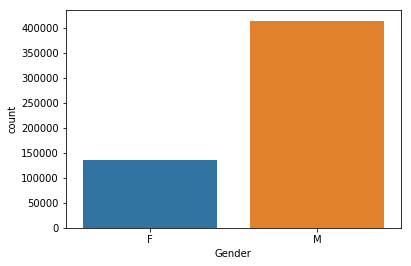

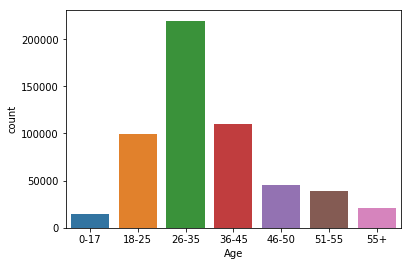

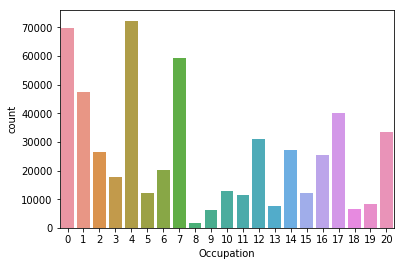

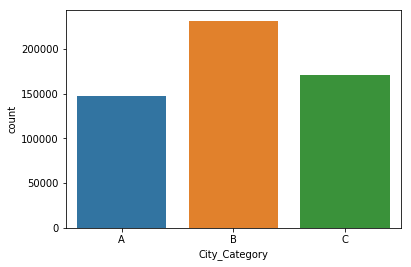

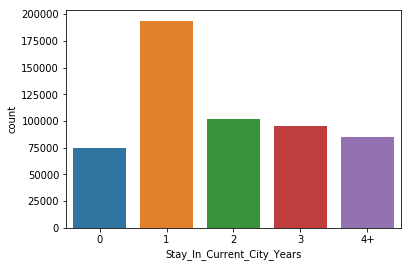

In [14]:
# Analysis by Gender, Age, Occupation, city_category and stay in current years
plt.subplots_adjust(hspace = 1.8)
for j in (df_final.columns[0:5]):
    plt.figure()
    print(sns.countplot(df_final[j]))    

#### Majority of the Customers are Males.
#### Majority of the customers are from 26-35 age group.
#### Most of them are from City B.
#### Most of them stay for 1 year.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 432x288 with 0 Axes>

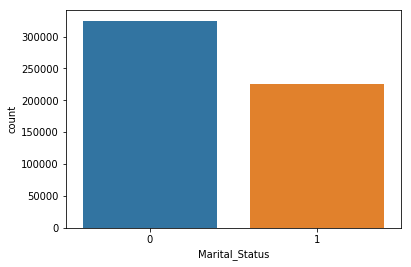

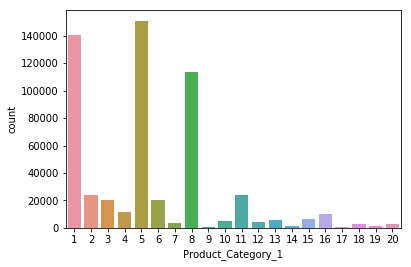

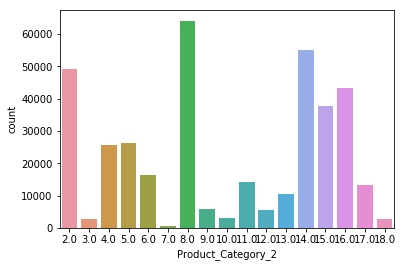

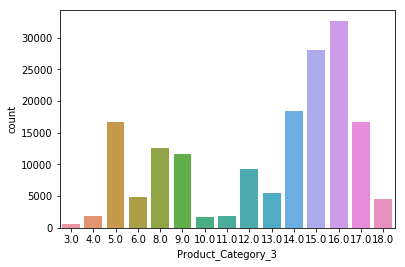

In [15]:
# Analysis by Gender, Age, Occupation and city_category
plt.subplots_adjust(hspace = 1.8)
for j in (df_final.columns[5:9]):
    plt.figure()
    print(sns.countplot(df_final[j]))    

#### Product codes 5,8,1 seem to be highest selling in Product_catgory type 1
#### Product codes 2,8,14 seem to be highest selling in Product_catgory type 2
#### Product codes 15,16 seem to be highest selling in Product_catgory type 3

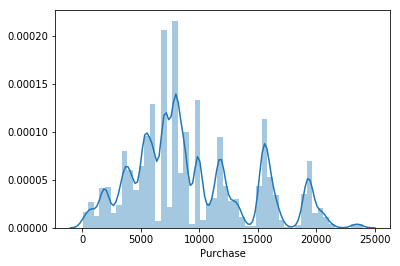

In [16]:
numeric_features=df_final.select_dtypes(include=[np.number])
for i, col in enumerate(numeric_features.columns):
    plt.figure(i)
    sns.distplot(df_final[col])

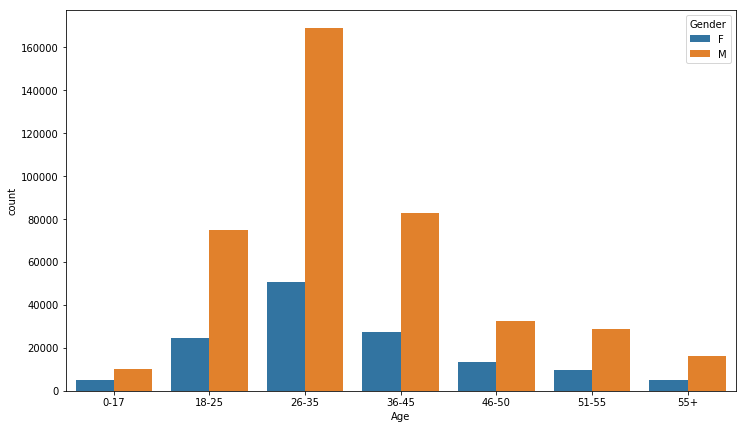

In [17]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df_final['Age'],hue=df_final['Gender'])

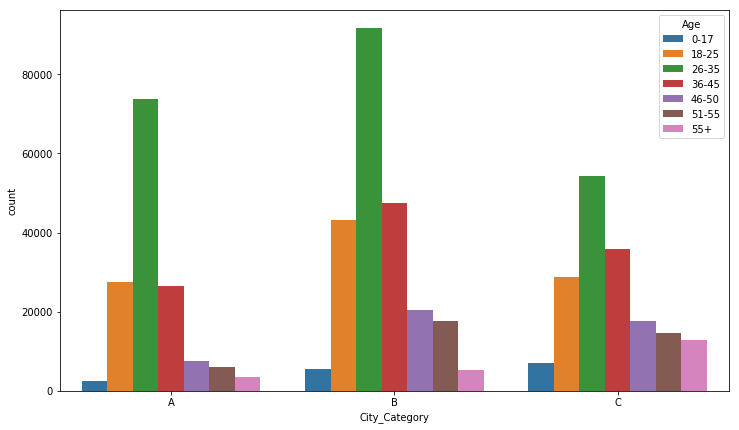

In [18]:
fig1, ax1 = plt.subplots(figsize=(12,7))

sns.countplot(df_final['City_Category'],hue=df_final['Age'])

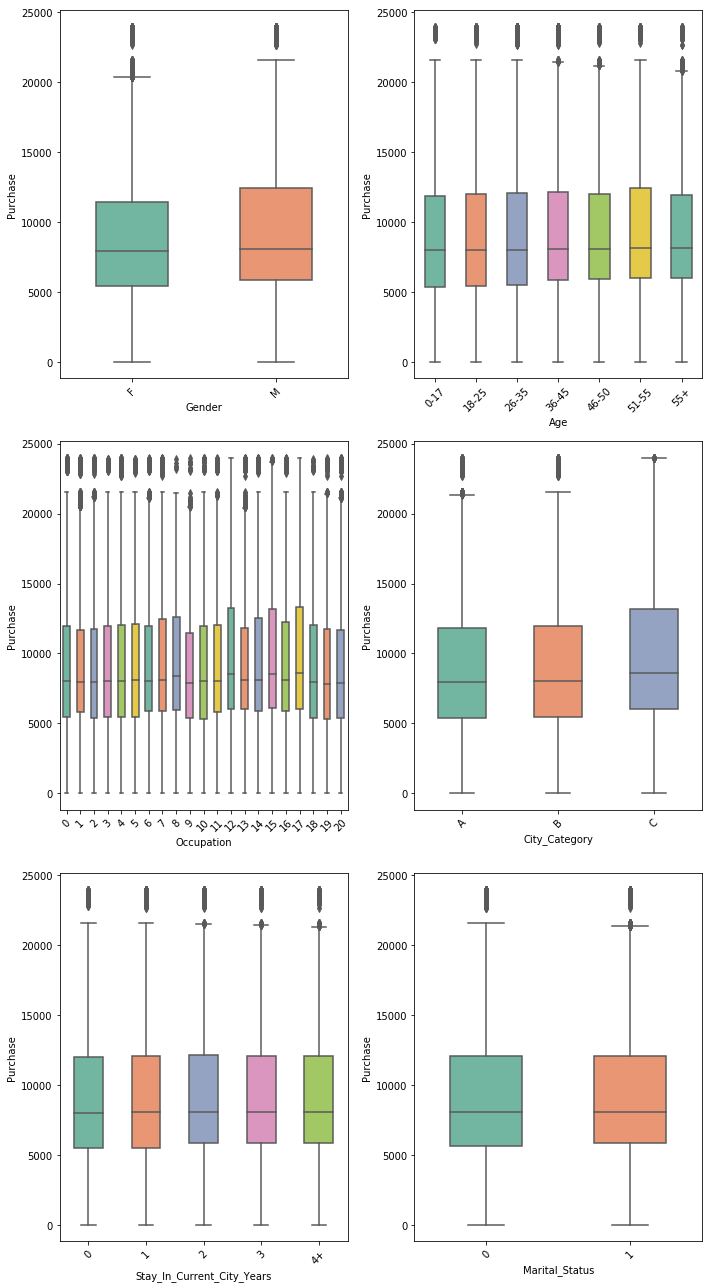

In [19]:
boxplots = df_final[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Purchase']]
cmap = sns.color_palette("Set2")

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10, 18))
a = [i for i in axes for i in i]
for i, ax in enumerate(a):
    sns.boxplot(y='Purchase', x=boxplots.columns[i], data=boxplots, palette=cmap, width=0.5, ax=ax);

# rotate x-axis for every single plot
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# set spacing for every subplot, else x-axis will be covered
plt.tight_layout()

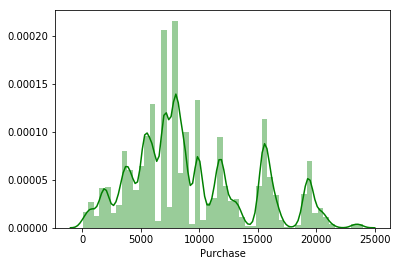

In [20]:
ax = sns.distplot(df_final['Purchase'], color='green')
plt.show()

In [87]:
# Merge train and test data to have same levels in both datasets
test_sub = test_df.loc[:,'Gender':'Product_Category_3'].astype('category')
test_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
Gender                        233599 non-null category
Age                           233599 non-null category
Occupation                    233599 non-null category
City_Category                 233599 non-null category
Stay_In_Current_City_Years    233599 non-null category
Marital_Status                233599 non-null category
Product_Category_1            233599 non-null category
Product_Category_2            161255 non-null category
Product_Category_3            71037 non-null category
dtypes: category(9)
memory usage: 2.0 MB


In [88]:
train_sub = df_final.loc[:,'Gender':'Product_Category_3']
train_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
Gender                        550068 non-null category
Age                           550068 non-null category
Occupation                    550068 non-null category
City_Category                 550068 non-null category
Stay_In_Current_City_Years    550068 non-null category
Marital_Status                550068 non-null category
Product_Category_1            550068 non-null category
Product_Category_2            376430 non-null category
Product_Category_3            166821 non-null category
dtypes: category(9)
memory usage: 4.7 MB


In [94]:
#get dummy variables
merge_df = train_sub.append(test_sub)
merge_df.Product_Category_1 = merge_df.Product_Category_1.astype('category')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 9 columns):
Gender                        783667 non-null category
Age                           783667 non-null category
Occupation                    783667 non-null category
City_Category                 783667 non-null category
Stay_In_Current_City_Years    783667 non-null category
Marital_Status                783667 non-null category
Product_Category_1            783667 non-null category
Product_Category_2            537685 non-null category
Product_Category_3            237858 non-null category
dtypes: category(9)
memory usage: 12.7 MB


In [97]:
#get dummy variables
merge_dummy = pd.get_dummies(merge_df)
print(merge_dummy.shape)
merge_dummy.head()

(783667, 92)


,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
# Separation of train and test rows
train_model = merge_dummy.iloc[0:(len(df)),]
test_model = merge_dummy.iloc[(len(df)):,]
train_model['Purchase'] = df.Purchase
train_model.head()

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Purchase
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8370
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,15200
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1422
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1057
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7969


# Train data for model building

In [ ]:
# correlation = df_model.corr()
# print(correlation['Purchase'].sort_values(ascending = False))

In [138]:
# importing the models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [140]:
feats = [f for f in train_model.columns if f not in ['Purchase']]
y_train = train_model['Purchase']
X_train = train_model[feats]
X_test = test_model[feats]

clf = LinearRegression()
model =clf.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=4)
predicted = clf.predict(X_test)

In [142]:
pred = test_df.loc[:, test_df.columns.isin(df_cat.columns)]

,0
0,13207.75
1,11004.75
2,5892.00
3,2246.25
4,2427.50
5,13046.50
6,12998.50
7,10623.25
8,19394.50
9,5980.25
